In [1]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to your dataset
dataset_path = "/content/drive/MyDrive/dataset"

# Confirm folder structure
for body_type in os.listdir(dataset_path):
    body_type_path = os.path.join(dataset_path, body_type)
    if os.path.isdir(body_type_path):
        print(f"{body_type}: {len(os.listdir(body_type_path))} images")

print("‚úÖ Dataset ready for preprocessing and training!")


Mounted at /content/drive
rectangle_body_shape: 251 images
inverted_triangle_body_shape: 213 images
pear_shaped_body: 261 images
apple_shaped_body: 259 images
hourglass_figure: 230 images
‚úÖ Dataset ready for preprocessing and training!


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Data paths
train_path = "/content/drive/MyDrive/dataset"

# Create dataset splits (80% train, 10% val, 10% test)
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# Load datasets
train_dataset = image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_dataset = image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Data augmentation layer
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2),
    keras.layers.RandomContrast(0.2),
])

# Prefetch for better performance
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

print("‚úÖ Data preparation complete!")


Found 1214 files belonging to 5 classes.
Using 972 files for training.
Found 1214 files belonging to 5 classes.
Using 242 files for validation.
‚úÖ Data preparation complete!


In [3]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam

# Number of body shape classes
NUM_CLASSES = 5  # Adjust this if the class count changes

# Load EfficientNetB0
base_model = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze base model layers
base_model.trainable = False

# Add custom classification layers
model = models.Sequential([
    data_augmentation,                 # Augmentation applied during training
    base_model,
    layers.GlobalAveragePooling2D(),   # Reduces feature maps to a vector
    layers.Dropout(0.5),               # Helps prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(NUM_CLASSES, activation='softmax')  # Softmax for multi-class output
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


16705208/16705208 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 0us/step


Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ sequential (Sequential)              ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ efficientnetb0 (Functional)          ‚îÇ (None, 7, 7, 1280)          ‚îÇ       4,049,571 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_average_pooling2d             ‚îÇ ?                           ‚îÇ               0 ‚îÇ
‚îÇ (GlobalAveragePooling2D)             ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)                    ‚îÇ ?                           ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout)                  ‚îÇ ?                           ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ ?                           ‚îÇ     0 (unbuilt) ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks for better training control
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    "/content/drive/MyDrive/efficientnetb0_best_model.h5",
    monitor='val_accuracy',
    save_best_only=True
)

# Train the model
EPOCHS = 30

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    callbacks=[early_stopping, model_checkpoint]
)

print("‚úÖ Training complete!")


Epoch 1/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 10s/step - accuracy: 0.2260 - loss: 1.8771 

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 409s 13s/step - accuracy: 0.2257 - loss: 1.8755 - val_accuracy: 0.2355 - val_loss: 1.6288
Epoch 2/30
30/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 219ms/step - accuracy: 0.2339 - loss: 1.7341

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55s 303ms/step - accuracy: 0.2333 - loss: 1.7338 - val_accuracy: 0.2727 - val_loss: 1.5920
Epoch 3/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 172ms/step - accuracy: 0.2514 - loss: 1.6477

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 274ms/step - accuracy: 0.2512 - loss: 1.6487 - val_accuracy: 0.3058 - val_loss: 1.5599
Epoch 4/30
30/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 173ms/step - accuracy: 0.2729 - loss: 1.6313

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 273ms/step - accuracy: 0.2715 - loss: 1.6328 - val_accuracy: 0.3264 - val_loss: 1.5375
Epoch 5/30
30/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 229ms/step - accuracy: 0.2442 - loss: 1.6279

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 328ms/step - accuracy: 0.2449 - loss: 1.6281 - val_accuracy: 0.3512 - val_loss: 1.5176
Epoch 6/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 203ms/step - accuracy: 0.2625 - loss: 1.6243

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 309ms/step - accuracy: 0.2628 - loss: 1.6238 - val_accuracy: 0.3719 - val_loss: 1.5008
Epoch 7/30
30/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 180ms/step - accuracy: 0.3029 - loss: 1.5871

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 239ms/step - accuracy: 0.3031 - loss: 1.5866 - val_accuracy: 0.3802 - val_loss: 1.4889
Epoch 8/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 177ms/step - accuracy: 0.3251 - loss: 1.5636

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 244ms/step - accuracy: 0.3250 - loss: 1.5635 - val_accuracy: 0.3843 - val_loss: 1.4765
Epoch 9/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 268ms/step - accuracy: 0.3161 - loss: 1.5626 - val_accuracy: 0.3843 - val_loss: 1.4623
Epoch 10/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 199ms/step - accuracy: 0.3164 - loss: 1.5483

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 327ms/step - accuracy: 0.3165 - loss: 1.5478 - val_accuracy: 0.4050 - val_loss: 1.4504
Epoch 11/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 212ms/step - accuracy: 0.3676 - loss: 1.5155 - val_accuracy: 0.4008 - val_loss: 1.4372
Epoch 12/30
30/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 174ms/step - accuracy: 0.3228 - loss: 1.5427

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 299ms/step - accuracy: 0.3234 - loss: 1.5420 - val_accuracy: 0.4174 - val_loss: 1.4288
Epoch 13/30
30/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 198ms/step - accuracy: 0.3990 - loss: 1.5074

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 255ms/step - accuracy: 0.3980 - loss: 1.5072 - val_accuracy: 0.4256 - val_loss: 1.4202
Epoch 14/30
30/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 225ms/step - accuracy: 0.3654 - loss: 1.4708

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 314ms/step - accuracy: 0.3647 - loss: 1.4712 - val_accuracy: 0.4339 - val_loss: 1.4117
Epoch 15/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 258ms/step - accuracy: 0.3690 - loss: 1.4627 - val_accuracy: 0.4298 - val_loss: 1.4057
Epoch 16/30
30/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 191ms/step - accuracy: 0.3637 - loss: 1.4685

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 315ms/step - accuracy: 0.3643 - loss: 1.4684 - val_accuracy: 0.4504 - val_loss: 1.3973
Epoch 17/30
30/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 228ms/step - accuracy: 0.3823 - loss: 1.4381

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 294ms/step - accuracy: 0.3837 - loss: 1.4368 - val_accuracy: 0.4587 - val_loss: 1.3885
Epoch 18/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 269ms/step - accuracy: 0.3943 - loss: 1.4454 - val_accuracy: 0.4463 - val_loss: 1.3816
Epoch 19/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 260ms/step - accuracy: 0.3926 - loss: 1.4128 - val_accuracy: 0.4504 - val_loss: 1.3753
Epoch 20/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 218ms/step - accuracy: 0.4357 - loss: 1.3869 - val_accuracy: 0.4504 - val_loss: 1.3661
Epoch 21/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 271ms/step - accuracy: 0.4137 - loss: 1.4063 - val_accuracy: 0.4545 - val_loss: 1.3568
Epoch 22/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 260ms/step - accuracy: 0.4305 - loss: 1.4162 - val_accuracy: 0.4545 - val_loss: 1.34

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 313ms/step - accuracy: 0.4513 - loss: 1.3811 - val_accuracy: 0.4669 - val_loss: 1.3386
Epoch 24/30
30/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 233ms/step - accuracy: 0.4051 - loss: 1.4028

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 332ms/step - accuracy: 0.4055 - loss: 1.4023 - val_accuracy: 0.4793 - val_loss: 1.3332
Epoch 25/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 173ms/step - accuracy: 0.4133 - loss: 1.3818

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 271ms/step - accuracy: 0.4139 - loss: 1.3815 - val_accuracy: 0.4876 - val_loss: 1.3290
Epoch 26/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 218ms/step - accuracy: 0.4073 - loss: 1.3898 - val_accuracy: 0.4835 - val_loss: 1.3252
Epoch 27/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 309ms/step - accuracy: 0.4312 - loss: 1.3668 - val_accuracy: 0.4835 - val_loss: 1.3217
Epoch 28/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 247ms/step - accuracy: 0.4206 - loss: 1.3527 - val_accuracy: 0.4711 - val_loss: 1.3181
Epoch 29/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 259ms/step - accuracy: 0.4672 - loss: 1.3302 - val_accuracy: 0.4876 - val_loss: 1.3106
Epoch 30/30
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 304ms/step - accuracy: 0.4523 - loss: 1.3174 - val_accuracy: 0.4876 - val_loss: 1.30

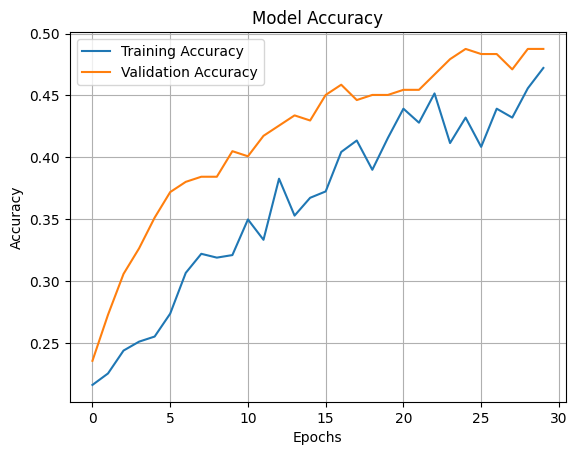

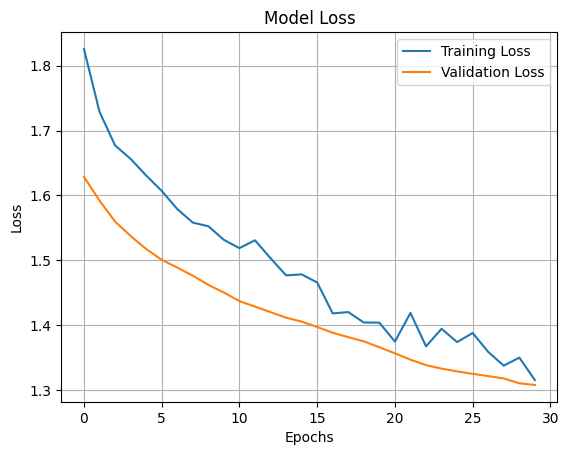

In [5]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 255ms/step - accuracy: 0.4839 - loss: 1.3495
‚úÖ Validation Accuracy: 48.76%
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 670ms/step
                   precision    recall  f1-score   support

     Apple-shaped       0.24      0.16      0.19        45
        Hourglass       0.11      0.11      0.11        54
Inverted Triangle       0.08      0.08      0.08        48
      Pear-shaped       0.21      0.33      0.26        55
        Rectangle       0.23      0.12      0.16        40

         accuracy                           0.17       242
        macro avg       0.17      0.16      0.16       242
     weighted avg       0.17      0.17      0.16       242



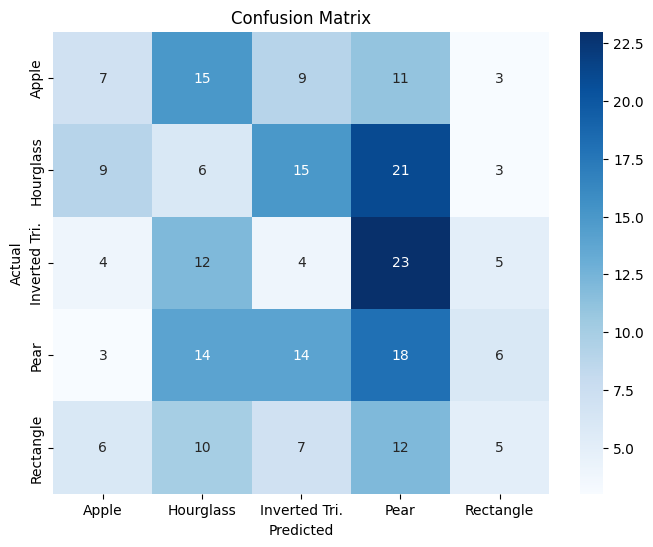

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Load the best saved model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/efficientnetb0_best_model.h5')

# Evaluate on the validation set
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"‚úÖ Validation Accuracy: {val_accuracy*100:.2f}%")

# Generate predictions
y_true = np.concatenate([y for x, y in val_dataset], axis=0)
y_pred = np.argmax(model.predict(val_dataset), axis=1)

# Classification report
print(classification_report(y_true, y_pred, target_names=[
    "Apple-shaped", "Hourglass", "Inverted Triangle", "Pear-shaped", "Rectangle"
]))

# Confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
    "Apple", "Hourglass", "Inverted Tri.", "Pear", "Rectangle"
], yticklabels=[
    "Apple", "Hourglass", "Inverted Tri.", "Pear", "Rectangle"
])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Analysis of Results
‚úÖ Accuracy: 48.76%
üîç Confusion Matrix & Classification Report Observations:

Low Precision & Recall across all classes ‚Äî the model struggles to differentiate body types clearly.
Pear-shaped class performs slightly better with 33% recall, but overall recognition remains weak.
Class Imbalance ‚Äî The confusion matrix shows heavy misclassification, especially for Hourglass and Inverted Triangle.
Possible Overfitting ‚Äî The model may have memorized training data instead of generalizing.

In [27]:
!pip install imagehash

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 296.7/296.7 kB 16.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4.5/4.5 MB 63.7 MB/s eta 0:00:00


In [29]:
!pip install albumentations imagehash


In [30]:
import os
import cv2
import imagehash
from PIL import Image
from collections import defaultdict
import albumentations as A
from albumentations.pytorch import ToTensorV2


In [31]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = "/content/drive/MyDrive/YourDatasetFolder"

body_types = [
    "apple_shaped_body",
    "hourglass_figure",
    "inverted_triangle_body_shape",
    "pear_shaped_body",
    "rectangle_body_shape"
]

BLUR_THRESHOLD = 100.0
TARGET_IMAGE_COUNT = 400


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
augmentation_pipeline = A.Compose([
    A.Rotate(limit=15, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.RandomResizedCrop(size=(512, 512), scale=(0.8, 1.0), ratio=(0.75, 1.33), p=0.5),
    A.ColorJitter(p=0.5),
    A.GaussianBlur(p=0.3),
    ToTensorV2()
])


In [36]:
def augment_image(image_path, save_path, count):
    img = cv2.imread(image_path)
    if img is None:
        return
    for i in range(count):
        augmented_img = augmentation_pipeline(image=img)['image'].permute(1, 2, 0).numpy()
        aug_image_path = os.path.join(save_path, f"{os.path.basename(image_path).split('.')[0]}_aug_{i+1}.jpg")
        cv2.imwrite(aug_image_path, cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR))
        print(f"Augmented Image Saved: {aug_image_path}")

def is_blurry(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return True
    return cv2.Laplacian(img, cv2.CV_64F).var() < BLUR_THRESHOLD

def find_duplicates(image_paths):
    hash_dict = defaultdict(list)
    for img_path in image_paths:
        try:
            img_hash = imagehash.phash(Image.open(img_path))
            hash_dict[img_hash].append(img_path)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
    return [files for files in hash_dict.values() if len(files) > 1]


In [37]:
def cleanup_and_augment():
    for body_type in body_types:
        folder_path = os.path.join(dataset_path, body_type)
        if not os.path.exists(folder_path):
            print(f"Skipping {body_type}: Folder not found.")
            continue

        image_paths = [
            os.path.join(folder_path, f)
            for f in os.listdir(folder_path)
            if f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ]

        # Detect and remove blurry images
        blurry_count = 0
        for img_path in image_paths:
            if is_blurry(img_path):
                print(f"Removing blurry image: {img_path}")
                os.remove(img_path)
                blurry_count += 1

        # Find and remove duplicate images
        duplicates = find_duplicates(image_paths)
        duplicate_count = 0
        for duplicate_set in duplicates:
            print(f"Removing duplicate images: {duplicate_set[1:]}")
            duplicate_count += len(duplicate_set) - 1
            for img in duplicate_set[1:]:  # Keep one copy, remove the rest
                os.remove(img)

        # Augment data if needed
        current_image_count = len([
            f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])
        images_to_generate = TARGET_IMAGE_COUNT - current_image_count

        if images_to_generate > 0:
            print(f"Generating {images_to_generate} augmented images for {body_type}.")
            for img_path in image_paths:
                augment_image(img_path, folder_path, images_to_generate // len(image_paths))

        print(f"‚úÖ Cleanup & Augmentation complete for {body_type} folder.")
        print(f"   ‚û§ {blurry_count} blurry images removed.")
        print(f"   ‚û§ {duplicate_count} duplicate images removed.")

if __name__ == "__main__":
    cleanup_and_augment()
    print("‚úÖ Dataset cleanup and augmentation complete!")


Skipping apple_shaped_body: Folder not found.
Skipping hourglass_figure: Folder not found.
Skipping inverted_triangle_body_shape: Folder not found.
Skipping pear_shaped_body: Folder not found.
Skipping rectangle_body_shape: Folder not found.
‚úÖ Dataset cleanup and augmentation complete!


In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define dataset paths
dataset_path = "/content/drive/MyDrive/dataset"

# Parameters
img_size = (224, 224)  # EfficientNet default size
batch_size = 32

# Load training and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

# Prefetching for performance boost
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


Found 1214 files belonging to 5 classes.
Using 972 files for training.
Found 1214 files belonging to 5 classes.
Using 242 files for validation.


In [39]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

# Model Architecture
base_model = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model layers

model = models.Sequential([
    layers.Rescaling(1./255),  # Normalize pixel values
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 classes for 5 body types
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [42]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6),
    ModelCheckpoint("best_model.h5", save_best_only=True)
]


In [43]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    callbacks=callbacks,
    verbose=1  # Detailed output for each epoch
)


Epoch 1/100
30/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 193ms/step - accuracy: 0.1995 - loss: 1.6198

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 250ms/step - accuracy: 0.2002 - loss: 1.6195 - val_accuracy: 0.2107 - val_loss: 1.6055 - learning_rate: 2.0000e-04
Epoch 2/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 205ms/step - accuracy: 0.2331 - loss: 1.6067

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 264ms/step - accuracy: 0.2325 - loss: 1.6068 - val_accuracy: 0.2107 - val_loss: 1.6054 - learning_rate: 2.0000e-04
Epoch 3/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 249ms/step - accuracy: 0.2331 - loss: 1.6096 - val_accuracy: 0.2107 - val_loss: 1.6054 - learning_rate: 2.0000e-04
Epoch 4/100
30/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 162ms/step - accuracy: 0.1748 - loss: 1.6147

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 213ms/step - accuracy: 0.1760 - loss: 1.6144 - val_accuracy: 0.2107 - val_loss: 1.6039 - learning_rate: 2.0000e-04
Epoch 5/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 198ms/step - accuracy: 0.2280 - loss: 1.6088 - val_accuracy: 0.2107 - val_loss: 1.6051 - learning_rate: 2.0000e-04
Epoch 6/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 246ms/step - accuracy: 0.2240 - loss: 1.6041 - val_accuracy: 0.2107 - val_loss: 1.6045 - learning_rate: 2.0000e-04
Epoch 7/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 202ms/step - accuracy: 0.1741 - loss: 1.6179 - val_accuracy: 0.2107 - val_loss: 1.6042 - learning_rate: 2.0000e-04
Epoch 8/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 201ms/step - accuracy: 0.2308 - loss: 1.6103 - val_accuracy: 0.2107 - val_loss: 1.6040 - learning_rate: 4.0000e-05
Epoch 9/100
31/31 ‚îÅ‚îÅ‚

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 243ms/step - accuracy: 0.1902 - loss: 1.6152 - val_accuracy: 0.2107 - val_loss: 1.6037 - learning_rate: 4.0000e-05
Epoch 10/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 160ms/step - accuracy: 0.1706 - loss: 1.6098

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 250ms/step - accuracy: 0.1712 - loss: 1.6098 - val_accuracy: 0.2107 - val_loss: 1.6036 - learning_rate: 4.0000e-05
Epoch 11/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 205ms/step - accuracy: 0.2285 - loss: 1.6070 - val_accuracy: 0.2107 - val_loss: 1.6037 - learning_rate: 4.0000e-05
Epoch 12/100
30/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 219ms/step - accuracy: 0.2262 - loss: 1.6106

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 269ms/step - accuracy: 0.2257 - loss: 1.6104 - val_accuracy: 0.2107 - val_loss: 1.6036 - learning_rate: 4.0000e-05
Epoch 13/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 197ms/step - accuracy: 0.2087 - loss: 1.6042 - val_accuracy: 0.2107 - val_loss: 1.6036 - learning_rate: 8.0000e-06
Epoch 14/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 203ms/step - accuracy: 0.2014 - loss: 1.6095 - val_accuracy: 0.2107 - val_loss: 1.6037 - learning_rate: 8.0000e-06
Epoch 15/100
30/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 216ms/step - accuracy: 0.2130 - loss: 1.6128

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 267ms/step - accuracy: 0.2124 - loss: 1.6126 - val_accuracy: 0.2107 - val_loss: 1.6036 - learning_rate: 8.0000e-06
Epoch 16/100
30/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 166ms/step - accuracy: 0.2152 - loss: 1.6033

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 266ms/step - accuracy: 0.2145 - loss: 1.6036 - val_accuracy: 0.2107 - val_loss: 1.6036 - learning_rate: 8.0000e-06
Epoch 17/100
30/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 163ms/step - accuracy: 0.1986 - loss: 1.6067

31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 259ms/step - accuracy: 0.1992 - loss: 1.6066 - val_accuracy: 0.2107 - val_loss: 1.6036 - learning_rate: 8.0000e-06
Epoch 18/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 229ms/step - accuracy: 0.2226 - loss: 1.6096 - val_accuracy: 0.2107 - val_loss: 1.6036 - learning_rate: 8.0000e-06
Epoch 19/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 216ms/step - accuracy: 0.2156 - loss: 1.6044 - val_accuracy: 0.2107 - val_loss: 1.6036 - learning_rate: 1.6000e-06
Epoch 20/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 200ms/step - accuracy: 0.1956 - loss: 1.6122 - val_accuracy: 0.2107 - val_loss: 1.6036 - learning_rate: 1.6000e-06
Epoch 21/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 202ms/step - accuracy: 0.2164 - loss: 1.6110 - val_accuracy: 0.2107 - val_loss: 1.6036 - learning_rate: 1.6000e-06
Epoch 22/100
31/31 ‚

In [44]:
loss, accuracy = model.evaluate(val_ds)
print(f"‚úÖ Final Validation Accuracy: {accuracy * 100:.2f}%")

8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 230ms/step - accuracy: 0.1983 - loss: 1.6063
‚úÖ Final Validation Accuracy: 21.07%


In [49]:
import os
import cv2
import imagehash
from PIL import Image
from collections import defaultdict
import albumentations as A
from albumentations.pytorch import ToTensorV2
from google.colab import drive
drive.mount('/content/drive')


# Set dataset directory path
# dataset_path = r"C:\Users\divya\Desktop\shape_identify\dataset"
dataset_path = "/content/drive/MyDrive/dataset"


# Define body types
body_types = [
    "apple_shaped_body",
    "hourglass_figure",
    "inverted_triangle_body_shape",
    "pear_shaped_body",
    "rectangle_body_shape"
]

# Parameters for blur detection
BLUR_THRESHOLD = 100.0
TARGET_IMAGE_COUNT = 400

# Augmentation pipeline
import albumentations as A
from albumentations.pytorch import ToTensorV2

augmentation_pipeline = A.Compose([
    A.Rotate(limit=15, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.RandomResizedCrop(size=(512, 512), scale=(0.7, 1.0), ratio=(0.75, 1.33), p=0.5),
    A.ColorJitter(p=0.5),
    A.GaussianBlur(p=0.3),
    ToTensorV2()
])


# Function to apply augmentations
def augment_image(image_path, save_path, count):
    img = cv2.imread(image_path)
    if img is None:
        return
    for i in range(count):
        augmented_img = augmentation_pipeline(image=img)['image'].permute(1, 2, 0).numpy()
        aug_image_path = os.path.join(save_path, f"{os.path.basename(image_path).split('.')[0]}_aug_{i+1}.jpg")
        cv2.imwrite(aug_image_path, cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR))
        print(f"Augmented Image Saved: {aug_image_path}")

# Function to check for blurry images
def is_blurry(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return True
    return cv2.Laplacian(img, cv2.CV_64F).var() < BLUR_THRESHOLD

# Function to find duplicate images
def find_duplicates(image_paths):
    hash_dict = defaultdict(list)
    for img_path in image_paths:
        try:
            img_hash = imagehash.phash(Image.open(img_path))
            hash_dict[img_hash].append(img_path)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
    return [files for files in hash_dict.values() if len(files) > 1]

# Main function for cleanup and augmentation
def cleanup_and_augment():
    for body_type in body_types:
        folder_path = os.path.join(dataset_path, body_type)
        if not os.path.exists(folder_path):
            print(f"Skipping {body_type}: Folder not found.")
            continue

        image_paths = [
            os.path.join(folder_path, f)
            for f in os.listdir(folder_path)
            if f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ]

        # Detect and remove blurry images
        blurry_count = 0
        for img_path in image_paths:
            if is_blurry(img_path):
                print(f"Removing blurry image: {img_path}")
                os.remove(img_path)
                blurry_count += 1

        # Find and remove duplicate images
        duplicates = find_duplicates(image_paths)
        duplicate_count = 0
        for duplicate_set in duplicates:
            print(f"Removing duplicate images: {duplicate_set[1:]}")
            duplicate_count += len(duplicate_set) - 1
            for img in duplicate_set[1:]:  # Keep one copy, remove the rest
                os.remove(img)

        # Augment data if needed
        current_image_count = len([
            f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])
        images_to_generate = TARGET_IMAGE_COUNT - current_image_count

        if images_to_generate > 0:
            print(f"Generating {images_to_generate} augmented images for {body_type}.")
            for img_path in image_paths:
                augment_image(img_path, folder_path, images_to_generate // len(image_paths))

        print(f"‚úÖ Cleanup & Augmentation complete for {body_type} folder.")
        print(f"   ‚û§ {blurry_count} blurry images removed.")
        print(f"   ‚û§ {duplicate_count} duplicate images removed.")

if __name__ == "__main__":
    cleanup_and_augment()
    print("‚úÖ Dataset cleanup and augmentation complete!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Generating 141 augmented images for apple_shaped_body.
‚úÖ Cleanup & Augmentation complete for apple_shaped_body folder.
   ‚û§ 0 blurry images removed.
   ‚û§ 0 duplicate images removed.
Generating 170 augmented images for hourglass_figure.
‚úÖ Cleanup & Augmentation complete for hourglass_figure folder.
   ‚û§ 0 blurry images removed.
   ‚û§ 0 duplicate images removed.
Generating 187 augmented images for inverted_triangle_body_shape.
‚úÖ Cleanup & Augmentation complete for inverted_triangle_body_shape folder.
   ‚û§ 0 blurry images removed.
   ‚û§ 0 duplicate images removed.
Generating 139 augmented images for pear_shaped_body.
‚úÖ Cleanup & Augmentation complete for pear_shaped_body folder.
   ‚û§ 0 blurry images removed.
   ‚û§ 0 duplicate images removed.
Generating 149 augmented images for rectangle_body_shape.
‚úÖ Cleanup & Augmentation complete for rec

In [52]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to dataset
DATASET_PATH = '/content/drive/MyDrive/dataset'

# Image dimensions and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation and loading
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split for train/validation
)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Model architecture
model = Sequential([
    ResNet50(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    verbose=True
)

# Save the model
model.save('/content/drive/MyDrive/body_shape_model.h5')

print("‚úÖ Training complete! Model saved successfully.")


Found 973 images belonging to 5 classes.
Found 241 images belonging to 5 classes.
94765736/94765736 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 140s 2s/step - accuracy: 0.3021 - loss: 2.3083 - val_accuracy: 0.1909 - val_loss: 26.6756
Epoch 2/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 922ms/step - accuracy: 0.2546 - loss: 1.6470 - val_accuracy: 0.2075 - val_loss: 3.5445
Epoch 3/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 934ms/step - accuracy: 0.3026 - loss: 1.5781 - val_accuracy: 0.2075 - val_loss: 1.8479
Epoch 4/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30s 951ms/step - accuracy: 0.3667 - loss: 1.4743 - val_accuracy: 0.2075 - val_loss: 1.6119
Epoch 5/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 28s 918ms/step - accuracy: 0.4244 - loss: 1.4395 - val_accuracy: 0.1909 - val_loss: 1.6212
Epoch 6/100
31/31 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 922ms/step - accuracy: 0.3878 - loss: 1.4445 - val_accuracy: 0.2075 

‚úÖ Training complete! Model saved successfully.


In [53]:
from google.colab import files
files.download('/content/drive/MyDrive/body_shape_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>